In [35]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
conn = sqlite3.connect('im.db')

pd.read_sql("""SELECT *
            FROM sqlite_master""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# Let's extract the various tables

Let's start with the movie_basics table

In [37]:
movie_basics = pd.read_sql("""
SELECT *
                            FROM movie_basics""",conn)
movie_basics.isna().sum()

len(movie_basics)

146144

In [38]:
#

The director's table

In [39]:
directors = pd.read_sql("""
SELECT *
                        FROM directors""",conn)
directors.isna().sum()


movie_id     0
person_id    0
dtype: int64

Known for table

In [40]:
known_for = pd.read_sql("""
SELECT * FROM known_for""",conn)
known_for.isna().sum()


person_id    0
movie_id     0
dtype: int64

Movie AKAs

In [41]:
movie_akas = pd.read_sql("""SELECT * FROM movie_akas""",conn)
movie_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

Movie ratings

In [42]:
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings""",conn)
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

Persons table

In [43]:
persons = pd.read_sql("""SELECT * FROM persons""",conn)
persons.isna().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

Principals table

In [44]:
principals = pd.read_sql("""SELECT * FROM principals""",conn)
principals.isna().sum()

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64

Writers table

In [45]:
writers = pd.read_sql("""SELECT * FROM writers""",conn)
writers.isna().sum()

movie_id     0
person_id    0
dtype: int64

## Let's create one merged dataset to conduct Further analysis on.

We shall merge the movie_basics and movie ratings tables.

In [46]:
moviename_ratings_df = pd.merge(left=movie_basics, right=movie_ratings, how='left', left_on='movie_id', right_on='movie_id')
moviename_ratings_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


We shall merge the moviename_ratings to the directors as we are interested in working with specific directors.

In [47]:
mr_directors_df = pd.merge(left=moviename_ratings_df, right=directors, how='left', left_on='movie_id', right_on='movie_id')
mr_directors_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,nm0002411


We shall merge the mr_directors with persons table to get the names.

In [48]:
movie_dir_df =pd.merge(left=mr_directors_df, right=persons, how='left', left_on='person_id', right_on='person_id')
movie_dir_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


We shall rename the data frame to final for ease of use.

In [49]:
final_df = movie_dir_df

We shall now proceed to drop unnecessary columns.

In [50]:
final_df.isna().sum()

movie_id                   0
primary_title              0
original_title            22
start_year                 0
runtime_minutes        55767
genres                  8790
averagerating         114760
numvotes              114760
person_id               5727
primary_name            5730
birth_year            228293
death_year            295163
primary_profession      6714
dtype: int64

We shall drop the Original title column .

In [51]:
final_df.drop(columns=['original_title'], inplace=True)

We shall drop  primary profession, as well


In [52]:
final_df.drop(columns=['primary_profession'], inplace=True)

We shall drop off dead directors as well.

In [53]:
final_df = final_df[final_df['death_year'].isna()]


We shall drop the rows with no primary name as we dont have a director for the film.

In [54]:
final_df = final_df[final_df['primary_name'].notna()]

In [55]:
len(final_df)

289433

We shall work with recent films 

In [56]:
final_df['start_year'].value_counts()

start_year
2016    37109
2014    36476
2017    33304
2018    32420
2015    31949
2013    28721
2011    26420
2012    25311
2010    21597
2019    14366
2020     1565
2021      154
2022       29
2023        6
2025        2
2027        2
2115        1
2024        1
Name: count, dtype: int64

We shall keep films from 2010 onwards

In [57]:
final_df = final_df[final_df['start_year']>=2009]

We shall drop films with missing genres

In [58]:
final_df = final_df[final_df['genres'].notna()]

Check for duplicates

In [59]:
#check for duplicate values once again

final_df.duplicated().sum()

124073

Drop the duplicates

In [60]:
final_df.drop_duplicates(inplace=True)

In [61]:
#check for missing values
final_df.isna().sum()

movie_id                0
primary_title           0
start_year              0
runtime_minutes     30729
genres                  0
averagerating       74297
numvotes            74297
person_id               0
primary_name            0
birth_year         126195
death_year         158835
dtype: int64

Let's check the stats for runtimes to decide what value to place in the empty cells

In [62]:
final_df['runtime_minutes'].describe()

count    128106.000000
mean         86.721168
std         224.278154
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

# about 90 to 110 minutes
Movies, too, have been reshaped by their technology, but in different ways than music. Movie length used to be limited to the size of a film reel, which plays about 11 minutes of footage. The standard length of a film is still, to this day, nine reels, or about 90 to 110 minutes long

Source : Vox

we shall set the missing values for runtime the mean time.

In [63]:
final_df['runtime_minutes'].fillna(final_df['runtime_minutes'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24776\2833522690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['runtime_minutes'].fillna(final_df['runtime_minutes'].mean(),inplace=True)


In [64]:
#check for missing values once again
final_df.isna().sum()

movie_id                0
primary_title           0
start_year              0
runtime_minutes         0
genres                  0
averagerating       74297
numvotes            74297
person_id               0
primary_name            0
birth_year         126195
death_year         158835
dtype: int64

Let's check the stats for average rating 

In [65]:
final_df['averagerating'].describe()

count    84538.000000
mean         6.339986
std          1.475908
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

We shall see the numbers for the ratings to decide if we shall use mean again

In [66]:
print('Less than 6 : ',(final_df['averagerating']<6).sum())
print('Less than 5 : ',(final_df['averagerating']<5).sum())
print('Less than 4 : ',(final_df['averagerating']<4).sum())
print('Less than 3 : ',(final_df['averagerating']<3).sum())
print('Less than 2 : ',(final_df['averagerating']<2).sum())

Less than 6 :  29792
Less than 5 :  14125
Less than 4 :  5969
Less than 3 :  1971
Less than 2 :  490


Text(0, 0.5, 'Number of films')

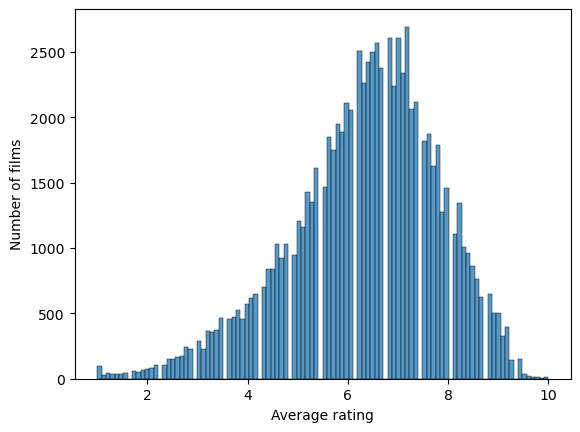

In [67]:
sns.histplot(final_df['averagerating'])
plt.xlabel('Average rating')
plt.ylabel('Number of films')

Let's pick out the directors with the most movies


In [68]:
xi = pd.Series(final_df['primary_name'].value_counts().head(20))

In [69]:
for i,k in xi.items():
    print(i,final_df[final_df['primary_name']==f'{i}'].isna().sum())
    



Omer Pasha movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
averagerating      60
numvotes           60
person_id           0
primary_name        0
birth_year         60
death_year         60
dtype: int64
Larry Rosen movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
averagerating      19
numvotes           19
person_id           0
primary_name        0
birth_year         53
death_year         53
dtype: int64
Rajiv Chilaka movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
averagerating      37
numvotes           37
person_id           0
primary_name        0
birth_year         49
death_year         49
dtype: int64
Stephan Düfel movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
averagerating      47
numvotes           47
person_id           0
primary_

We shall pull samples for 3 directors, 3 with no blank ratings(Sergey A. , Paul T.T. Easter , David DeCoteau) 

Using the above names we shall conduct hypothesis tests to establish whether these directors perfom significantly better at Alpha = 0.05

Ho1 = 'Director performance is normal'

Ha1 = 'Director perfomance is above average' 

In [70]:
mu = final_df['averagerating'].mean()
std = final_df['averagerating'].std()
alpha = 0.05
print(mu, std)

6.339985568620028 1.4759082630923703


1. Sergey

In [71]:
#Sergey A. hypothesis 
sergey_a = final_df[final_df['primary_name']=='Sergey A.']

Ho1 = Sergey ratings are normal

Ha1 = Sergey ratings are better

In [72]:
t_statistic, p_value = stats.ttest_1samp(a=sergey_a['averagerating'], popmean=6.33) 
print(t_statistic , p_value)

7.134987766901874 1.616225344726199e-08


We reject the null. Based on the p-value generated we shall recommend working with Sergey

2. Paul T.T. Easter 

In [73]:
#Paul T.T. Easter hypothesis 
paul_t = final_df[final_df['primary_name']=='Paul T.T. Easter']

Ho2 = Paul T.T. Easter ratings are normal.

Ha2 = Paul T.T. Easter ratings are better. 

In [74]:
t_statistic, p_value = stats.ttest_1samp(a=paul_t['averagerating'], popmean=6.33) 
print(t_statistic , p_value)

-16.871460859285637 7.235729552707125e-16


We reject the null. Based on the p value, Paul perfoms better than the population

3. David DeCoteau

In [75]:
david_decoteau = final_df[final_df['primary_name']=='David DeCoteau']

Ho3 = David DeCoteau ratings are normal

Ha3 = David DeCoteau ratings are better

In [76]:
t_statistic, p_value = stats.ttest_1samp(a=david_decoteau['averagerating'], popmean=6.33) 
print(t_statistic , p_value)

-14.376144076855885 6.93459619144652e-14


We reject the null. David DeCoteau ratings are better. 

# We shall do a pair wise test against our 3 directors to rank them in order of preference

Ho: the directors perform the same

Ha : the directors are different in performance


Sergey vs Paul

In [88]:
stats.ttest_ind(a=sergey_a['averagerating'], b=paul_t['averagerating'], equal_var=True)

TtestResult(statistic=17.38128792235194, pvalue=3.968110862350945e-26, df=65.0)

From the above, Sergey performs differently and better.

David vs Paul

In [86]:
stats.ttest_ind(a=david_decoteau['averagerating'], b=paul_t['averagerating'].mean(), equal_var=True)

TtestResult(statistic=0.10597116957413044, pvalue=0.9164186149574254, df=26.0)

From the above the performance of David and Paul are similar

In [89]:
#to confirm and view the means

paul_t['averagerating'].mean(), sergey_a['averagerating'].mean(), david_decoteau['averagerating'].mean()

(3.285714285714286, 7.44102564102564, 3.4)